<a href="https://colab.research.google.com/github/SankaranarayananA/Mini-Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification
 for 
Categories of flowers:Rose,Sunflowerand Lily

In [ ]:
 import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

In [ ]:
#Downloading data
!wget https://codeload.github.com/SankaranarayananA/Mini-Project/zip/refs/heads/main

--2021-04-23 18:30:40--  https://codeload.github.com/SankaranarayananA/Mini-Project/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main’

main                    [       <=>          ] 919.19M  28.2MB/s    in 34s     

2021-04-23 18:31:14 (26.7 MB/s) - ‘main’ saved [963843027]



In [ ]:
!unzip /content/main

Archive:  /content/main
bb2c433122dfeac9466562518cf04c5517307cc1
   creating: Mini-Project-main/
   creating: Mini-Project-main/Dataset/
  inflating: Mini-Project-main/Dataset/README_rpc-cv-images.txt  
   creating: Mini-Project-main/Dataset/paper/
  inflating: Mini-Project-main/Dataset/paper/04l5I8TqdzF9WDMJ.png  
  inflating: Mini-Project-main/Dataset/paper/0Og76sl5CJhbxWWx.png  
  inflating: Mini-Project-main/Dataset/paper/0RA9rcrv8iVvuDDU.png  
  inflating: Mini-Project-main/Dataset/paper/0Uomd0HvOB33m47I.png  
  inflating: Mini-Project-main/Dataset/paper/0a3UtNzl5Ll3sq8K.png  
  inflating: Mini-Project-main/Dataset/paper/0cb6cVL8pkfi4wF6.png  
 extracting: Mini-Project-main/Dataset/paper/0eqArS2GgsBeqgSn.png  
  inflating: Mini-Project-main/Dataset/paper/0t08v9bAaA0mXGCQ.png  
  inflating: Mini-Project-main/Dataset/paper/0vugygEjxQJPr9yz.png  
  inflating: Mini-Project-main/Dataset/paper/0zKU6wEhT2cDe9j0.png  
  inflating: Mini-Project-main/Dataset/paper/14K62H4KG1hg5qiJ.png  
  i

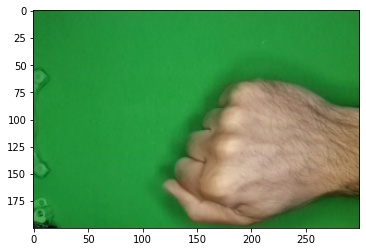

In [ ]:
# Displaying the image
img1 = plt.imread('/content/Mini-Project-main/Dataset/rock/00nKV8oHuTGi20gq.png')
plt.imshow(img1)

In [ ]:
import os
import numpy as np
datadir = '/content/Mini-Project-main/Dataset'

categories = ['paper','rock','scissors'] # Name the folder with these categories
target = []
flat_data = []

for i in categories:
  path = os.path.join(datadir,i)
  #print(path)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    # plt.imshow(img_array)
    # plt.show()
    img_resize = resize(img_array,(150,150,3)) # Value gets converted 0-1 from 0-255
    flat_data.append(np.ndarray.flatten(img_resize))
    target.append(i)

flat_data = np.array(flat_data)
target = np.array(target)

In [ ]:
df = pd.DataFrame(flat_data)
df['Target'] = target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.147386,0.484314,0.167974,0.137582,0.475163,0.158824,0.138889,0.471895,0.163072,0.137255,0.471895,0.161438,0.132026,0.471569,0.153922,0.136928,0.474837,0.161111,0.139542,0.479085,0.170261,0.137582,0.475163,0.161438,0.137255,0.476797,0.159804,0.139542,0.480392,0.167320,0.140196,0.484314,0.174837,0.139542,0.484314,0.173856,0.134314,0.482026,0.168301,0.141503,...,0.131373,0.505882,0.166667,0.131373,0.507843,0.158824,0.143791,0.508497,0.168627,0.147712,0.504248,0.172549,0.145098,0.501961,0.169935,0.143464,0.500654,0.161111,0.145098,0.501961,0.163399,0.141503,0.496405,0.169281,0.143137,0.490196,0.164706,0.149020,0.486275,0.160784,0.143137,0.484314,0.162418,0.137255,0.482353,0.160784,0.139216,0.482353,0.158824,paper
1,0.129412,0.462418,0.116340,0.126471,0.458824,0.113725,0.126797,0.461111,0.117647,0.132680,0.466667,0.121242,0.134314,0.466993,0.120588,0.139869,0.472876,0.126144,0.146732,0.478105,0.131373,0.142484,0.466667,0.125163,0.145752,0.473529,0.123529,0.147059,0.475817,0.127451,0.152941,0.481373,0.137908,0.152941,0.482353,0.138889,0.146078,0.482680,0.130719,0.149673,...,0.145752,0.488562,0.157843,0.145098,0.482353,0.149346,0.150654,0.491830,0.154575,0.147386,0.485294,0.151307,0.147386,0.485294,0.153922,0.149020,0.486275,0.160784,0.148693,0.480392,0.154902,0.143137,0.472549,0.147059,0.143137,0.468627,0.145098,0.149020,0.466667,0.145098,0.149020,0.463072,0.143464,0.149020,0.462418,0.141176,0.149020,0.462745,0.143137,paper
2,0.149346,0.509804,0.193137,0.146078,0.504902,0.192157,0.155556,0.509150,0.199346,0.154575,0.514706,0.200980,0.150980,0.516013,0.204575,0.152941,0.519935,0.211438,0.154575,0.521569,0.209477,0.151307,0.514706,0.203922,0.156536,0.518627,0.204248,0.158824,0.523856,0.208824,0.164379,0.531046,0.217647,0.157843,0.531046,0.213725,0.148366,0.526471,0.206863,0.153922,...,0.138562,0.418954,0.166340,0.138562,0.408824,0.160784,0.142157,0.402941,0.158497,0.146078,0.397059,0.155882,0.148693,0.389542,0.158497,0.151961,0.383333,0.167974,0.144771,0.373529,0.156209,0.140850,0.365359,0.146405,0.144444,0.353595,0.146405,0.151961,0.346405,0.148366,0.150327,0.331046,0.142810,0.146405,0.314052,0.132680,0.149673,0.303268,0.132026,paper
3,0.189216,0.566667,0.233333,0.189542,0.569281,0.241176,0.184314,0.569281,0.243137,0.190196,0.571569,0.243791,0.192157,0.570915,0.239216,0.197712,0.574837,0.249020,0.199673,0.580392,0.254902,0.198039,0.578758,0.256863,0.193791,0.577124,0.256209,0.196078,0.579085,0.254902,0.200000,0.581373,0.256863,0.203922,0.590196,0.264379,0.203268,0.593464,0.266013,0.200000,...,0.153595,0.547386,0.200000,0.152941,0.548693,0.200000,0.152941,0.545098,0.194118,0.152288,0.545098,0.193791,0.150654,0.539869,0.195098,0.152288,0.538889,0.193791,0.148693,0.527451,0.189542,0.146732,0.521569,0.182353,0.142484,0.518301,0.177778,0.149346,0.521569,0.184314,0.150980,0.519608,0.182353,0.149020,0.513725,0.176471,0.149020,0.513725,0.174837,paper
4,0.117647,0.434314,0.142157,0.117320,0.428758,0.141176,0.118954,0.433333,0.141830,0.117647,0.435948,0.141176,0.118954,0.437582,0.139216,0.122222,0.442810,0.148693,0.125163,0.448693,0.152941,0.119608,0.445425,0.150654,0.115686,0.443791,0.143137,0.122549,0.449673,0.148693,0.126797,0.457516,0.154902,0.129412,0.459150,0.157190,0.125490,0.453268,0.153922,0.127124,...,0.125163,0.485948,0.175817,0.123529,0.484314,0.176471,0.125490,0.486275,0.176471,0.127124,0.486601,0.168954,0.129412,0.486601,0.171895,0.127778,0.481046,0.169281,0.129412,0.482353,0.171569,0.125490,0.478431,0.164379,0.129085,0.472549,0.160784,0.137255,0.470588,0.161111,0.140850,0.464379,0.157190,0.140850,0.454902,0.152941,0.144771,0.454902,0.154575,paper


In [ ]:
x = flat_data
y = target

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42,stratify=y)

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.svm import SVC
model = SVC(C=1,kernel='rbf')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.9707495429616088

In [ ]:
confusion_matrix(y_pred,y_test)

array([[169,   1,   2],
       [  3, 177,   0],
       [  6,   4, 185]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       paper       0.98      0.95      0.97       178
        rock       0.98      0.97      0.98       182
    scissors       0.95      0.99      0.97       187

    accuracy                           0.97       547
   macro avg       0.97      0.97      0.97       547
weighted avg       0.97      0.97      0.97       547



In [ ]:
!wget https://www.gardeningknowhow.com/wp-content/uploads/2019/11/red-rose.jpg

--2021-04-23 18:28:58--  https://www.gardeningknowhow.com/wp-content/uploads/2019/11/red-rose.jpg
Resolving www.gardeningknowhow.com (www.gardeningknowhow.com)... 151.139.128.11
Connecting to www.gardeningknowhow.com (www.gardeningknowhow.com)|151.139.128.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 290760 (284K) [image/jpeg]
Saving to: ‘red-rose.jpg’

red-rose.jpg        100%[===================>] 283.95K  --.-KB/s    in 0.02s   

2021-04-23 18:28:58 (12.1 MB/s) - ‘red-rose.jpg’ saved [290760/290760]



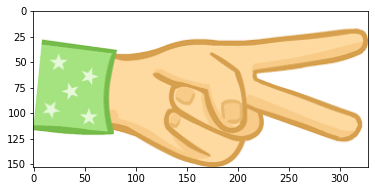

In [ ]:
img = plt.imread('/content/images.png')
plt.imshow(img)

In [ ]:
img_array = imread('/content/images.png')
img_resize = resize(img_array,(150,150,3)) 
img_resize = np.ndarray.flatten(img_resize)

In [ ]:
model.predict(img_resize.reshape(1,-1))

array(['scissors'], dtype='<U8')

In [ ]:
!wget https://www.pngkey.com/png/detail/173-1734880_jpg-free-download-game-rock-paper-scissors-clipart.png 


--2021-04-23 16:14:38--  https://www.pngkey.com/png/detail/173-1734880_jpg-free-download-game-rock-paper-scissors-clipart.png
Resolving www.pngkey.com (www.pngkey.com)... 204.12.208.124
Connecting to www.pngkey.com (www.pngkey.com)|204.12.208.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53176 (52K) [image/png]
Saving to: ‘173-1734880_jpg-free-download-game-rock-paper-scissors-clipart.png’

173-1734880_jpg-fre 100%[===================>]  51.93K  --.-KB/s    in 0.02s   

2021-04-23 16:14:38 (2.03 MB/s) - ‘173-1734880_jpg-free-download-game-rock-paper-scissors-clipart.png’ saved [53176/53176]



In [ ]:
img = plt.imread('/content/img.png')
plt.imshow(img)

ValueError: ignored